1) What are the columns and data types in the dataset?
2) How many missing values are present in each column?
3) What are the unique values for categorical columns (e.g., country, status)?What is the distribution of life expectancy across different countries?
4) What is the correlation between life expectancy and other numerical features?
5) What are the top 10 countries with the highest and lowest GDP?
6) What is the trend of life expectancy over the years for different regions?
7) How does adult mortality impact life expectancy across countries?
8) Is there a significant relationship between life expectancy and GDP per capita?
9) How does alcohol consumption relate to life expectancy?
10) What is the impact of BMI on life expectancy in different countries?
11) Does immunization coverage (Hepatitis B, Polio) affect life expectancy?
12) What is the effect of total health expenditure on life expectancy

In [153]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
#load datasset
path="Life Expectancy Data.csv"

data=pd.read_csv(path)
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [155]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [156]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [157]:
# 1) What are the columns and data types in the dataset?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [158]:
#Missing values

missing_values=data.isnull().sum()
missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [159]:
# 3) What are the unique values for categorical columns (e.g., country, status)?What is the distribution of life expectancy across different countries?

print("Unique values for 'Country':", data['Country'].unique())
print("Unique values for 'Status':", data['Status'].unique())

life_expectancy_distribution=data.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)
life_expectancy_distribution.head()



Unique values for 'Country': ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia'

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: Life expectancy , dtype: float64

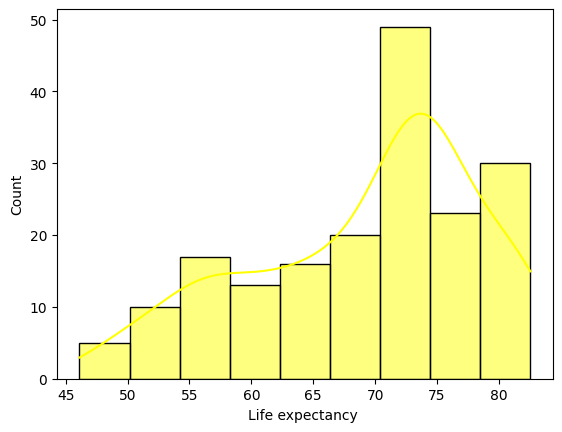

In [172]:
# What is the distribution of life expectancy across different countries?

sns.histplot(life_expectancy_distribution, kde=True, color='yellow',)
pyplot.show()

In [161]:
# 4) What is the correlation between life expectancy and other numerical features?


numerical_cols=data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix=data[numerical_cols].corr()
print(correlation_matrix['Life expectancy '])


Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                         -0.556556
GDP                                0.461455
Population                        -0.021538
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64


<Axes: >

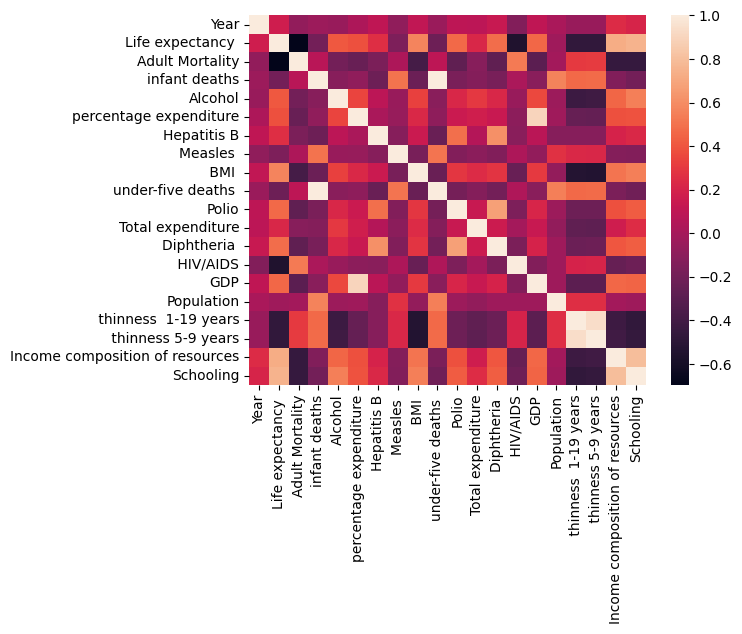

In [162]:
#heatmap of correlation
sns.heatmap(correlation_matrix[::])

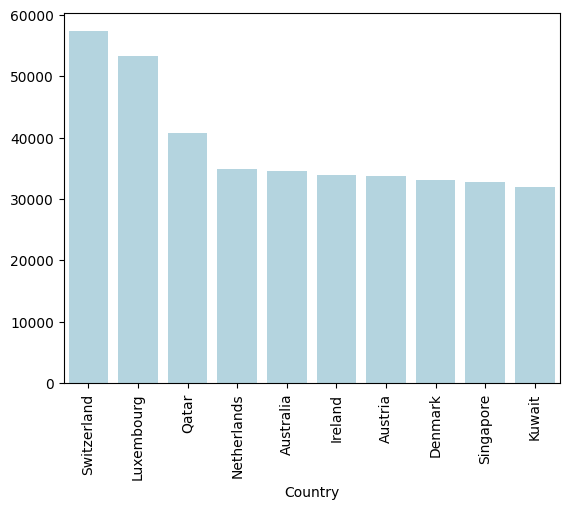

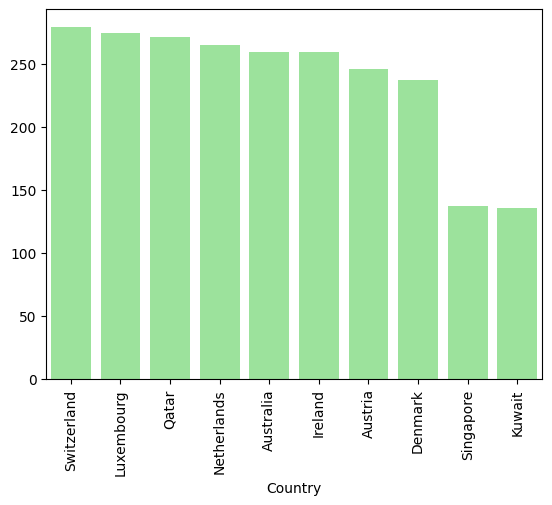

In [163]:
# What are the top 10 countries with the highest and lowest GDP? show in plot 
# without considering missing values (drop missing values below)

data=data.dropna(subset=['GDP'])
gdp_distribution=data.groupby('Country')['GDP'].mean().sort_values(ascending=False)

sns.barplot(x=gdp_distribution.head(10).index, y=gdp_distribution.head(10).values, color='lightblue')
pyplot.xticks(rotation=90)
pyplot.show()

sns.barplot(x=gdp_distribution.head(10).index, y=gdp_distribution.tail(10).values, color='lightgreen')
pyplot.xticks(rotation=90)
pyplot.show()


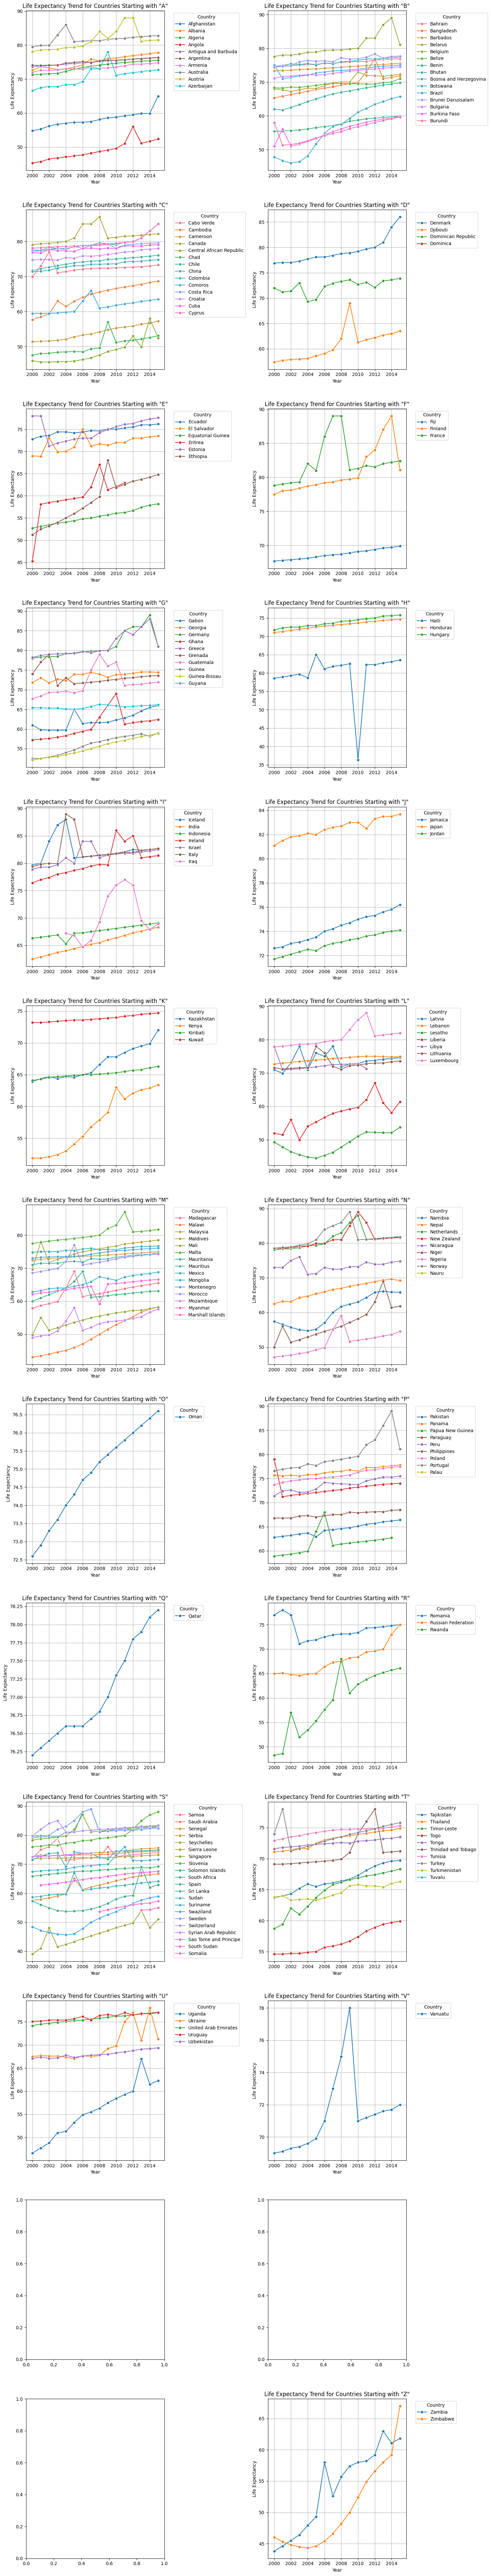

In [164]:
import string
import math

# Grouping the data by Year and Country, then calculating the mean life expectancy
region_life_expectancy = data.groupby(['Year', 'Country'])['Life expectancy '].mean().reset_index()

# Create a plot for each group of countries starting with the same letter
# Calculate the number of rows required (2 columns per row)
num_plots = len(string.ascii_uppercase)  # One plot for each letter A-Z
num_rows = math.ceil(num_plots / 2)  # Two plots per row

# Create subplots (dynamic number of rows and 2 columns)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))  # Adjust height based on number of rows
axes = axes.flatten()  # Flatten to make indexing easier

# Iterate over each letter in the alphabet and plot the life expectancy trends
for i, letter in enumerate(string.ascii_uppercase):
    # Filter countries starting with the current letter
    countries_starting_with_letter = region_life_expectancy[region_life_expectancy['Country'].str.startswith(letter)]
    
    # If there are countries starting with this letter, plot them
    if not countries_starting_with_letter.empty:
        ax = axes[i]  # Select the subplot for the current plot
        sns.lineplot(x='Year', y='Life expectancy ', hue='Country', data=countries_starting_with_letter, marker='o', ax=ax)
        ax.set_title(f'Life Expectancy Trend for Countries Starting with "{letter}"')
        ax.set_xlabel('Year')
        ax.set_ylabel('Life Expectancy')
        ax.grid(True)
        ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


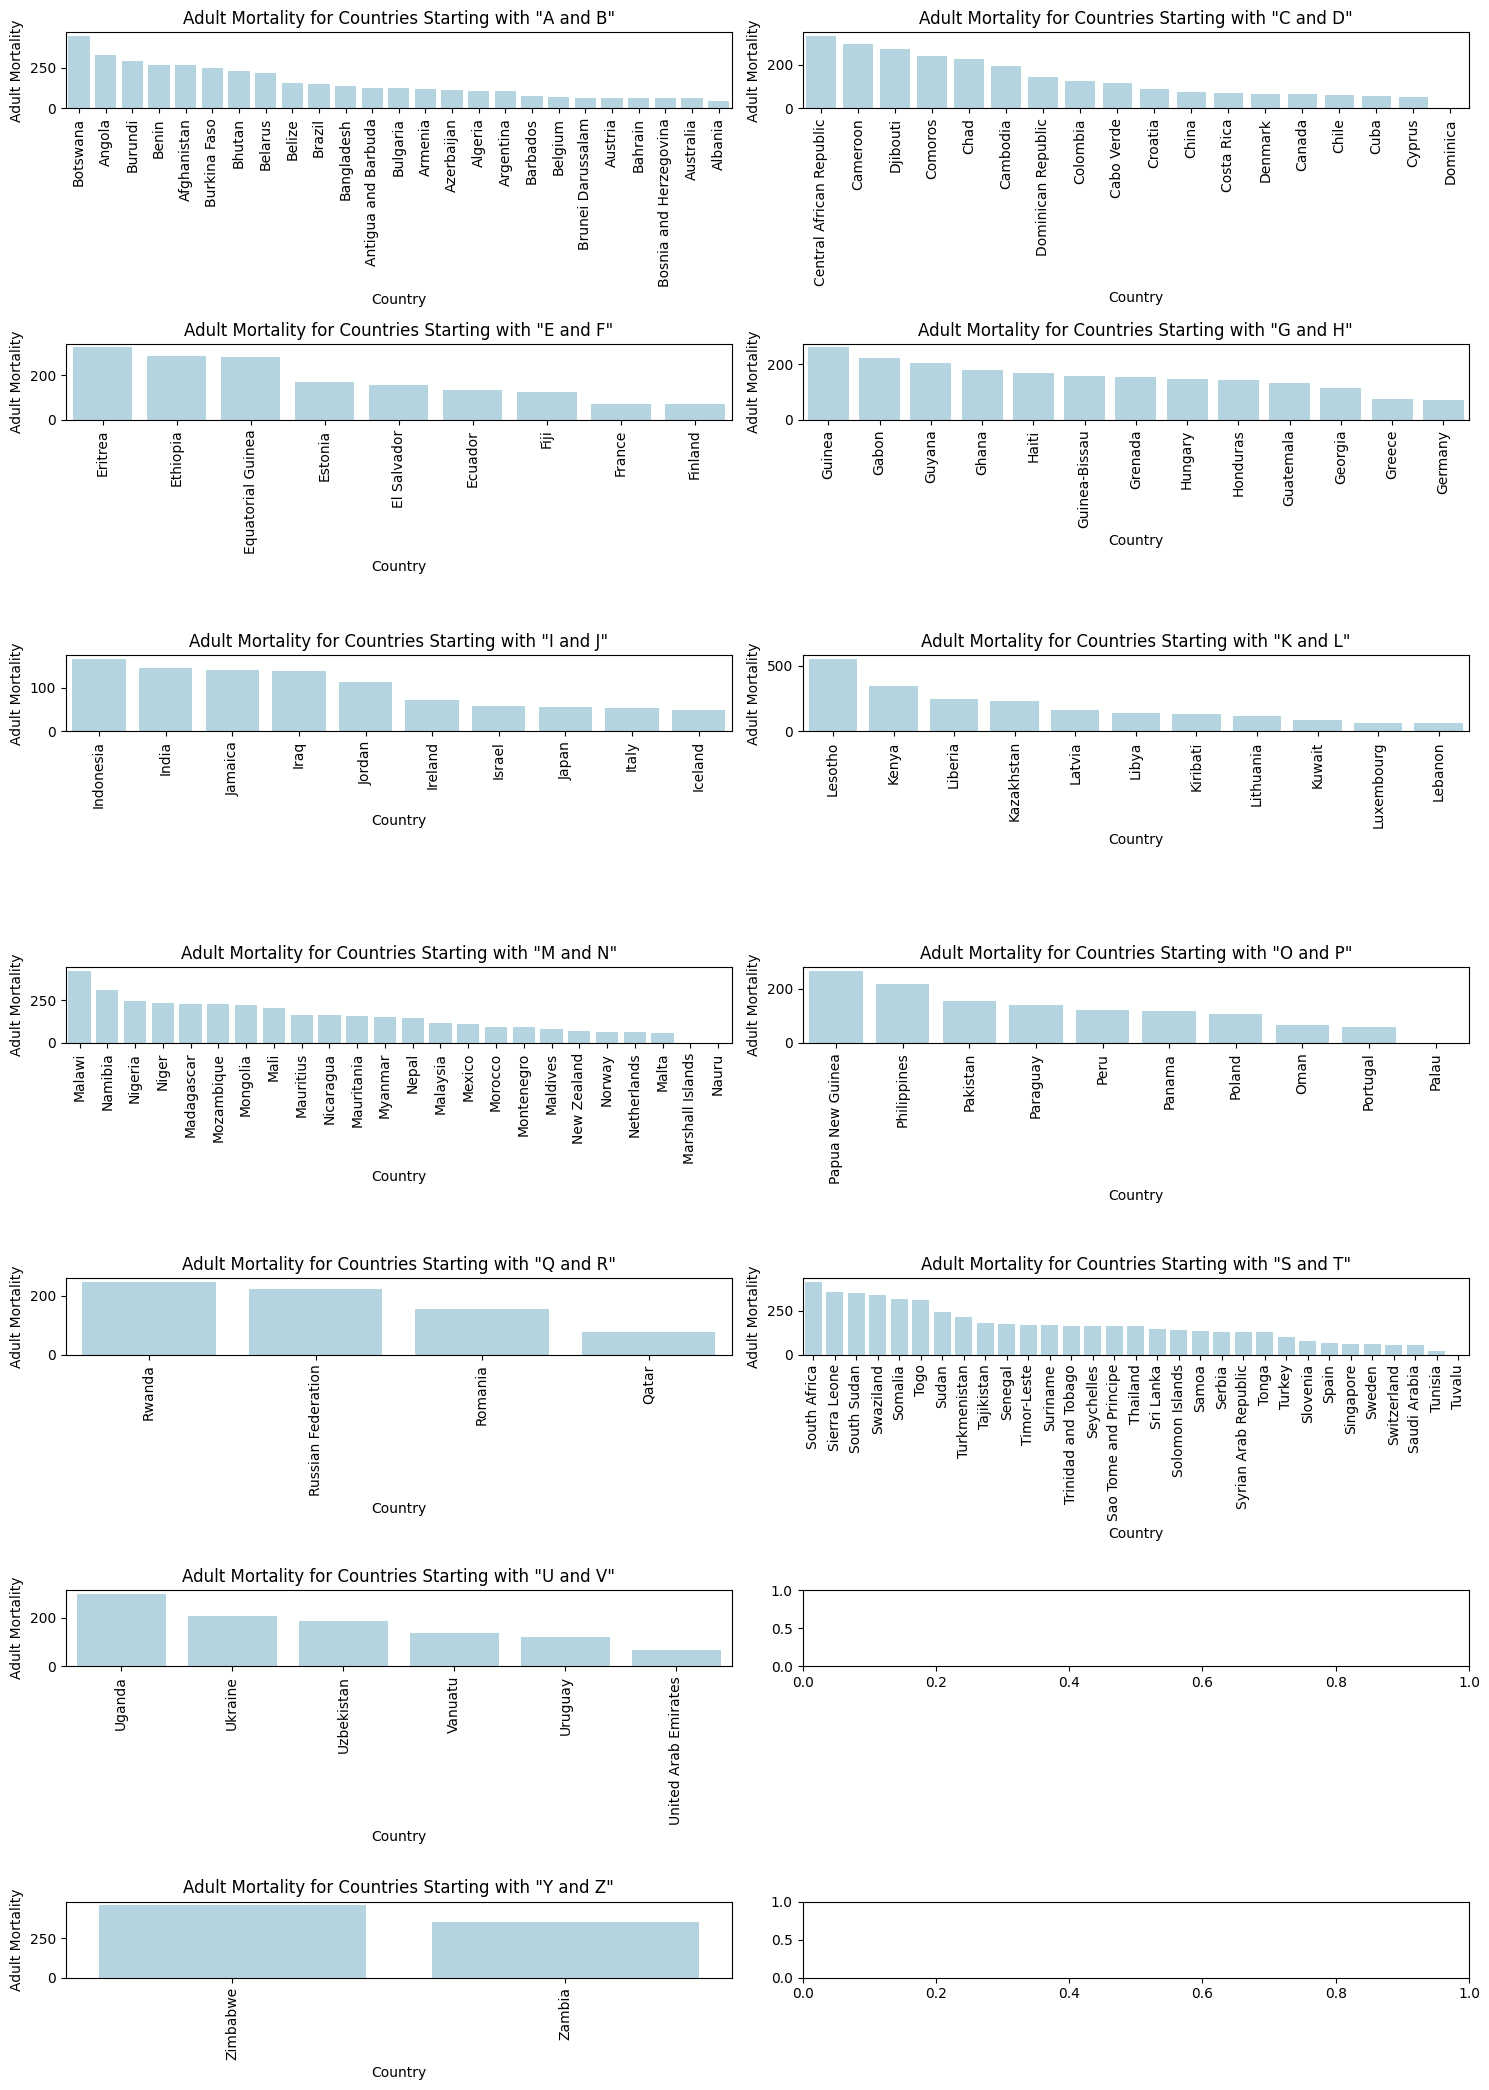

In [165]:
# Grouping data by country and calculating the mean adult mortality
adult_mortality_impact = data.groupby('Country')['Adult Mortality'].mean().sort_values(ascending=False)

# Split countries into pairs of letters (A-B, C-D, etc.)
country_groups = [(string.ascii_uppercase[i], string.ascii_uppercase[i+1]) for i in range(0, len(string.ascii_uppercase), 2)]

# Calculate the number of rows needed based on the number of country pairs
num_rows = math.ceil(len(country_groups) / 2)

# Create subplots (dynamic number of rows and 2 columns)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 3))  # Adjust height dynamically based on rows
axes = axes.flatten()  # Flatten to make indexing easier

# Create a plot for each group of countries starting with paired letters
for i, group in enumerate(country_groups):
    # Filter countries that start with the current pair of letters
    filtered_countries = adult_mortality_impact[adult_mortality_impact.index.str.startswith(tuple(group))]
    
    # If there are countries in this group, plot them
    if not filtered_countries.empty:
        ax = axes[i]  # Select the subplot for the current plot
        sns.barplot(x=filtered_countries.index, y=filtered_countries.values, color='lightblue', ax=ax)
        ax.set_title(f'Adult Mortality for Countries Starting with "{group[0]} and {group[1]}"')
        ax.set_xlabel('Country')
        ax.set_ylabel('Adult Mortality')
        ax.tick_params(axis='x', rotation=90)  # Rotate x labels for better visibility

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


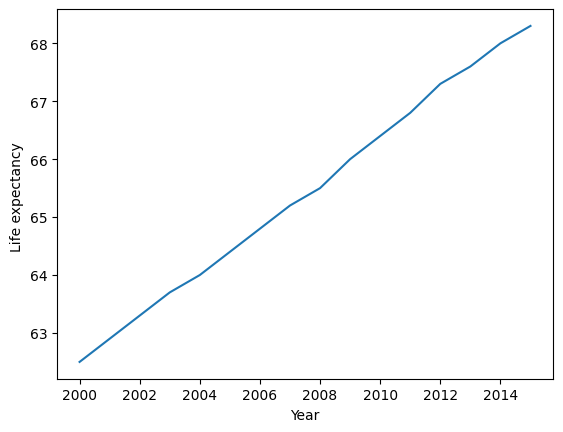

In [166]:
#now i want year by year life expectancy of country "india"

india_life_expectancy=data[data['Country']=='India']['Life expectancy ']
sns.lineplot(x=data[data['Country']=='India']['Year'], y=india_life_expectancy)
plt.show()



In [167]:

# 8) Is there a significant relationship between life expectancy and GDP per capita?

correlation_gdp_life_expectancy=data[['Life expectancy ', 'GDP']].corr().iloc[0, 1]
correlation_gdp_life_expectancy

0.4614551926207384

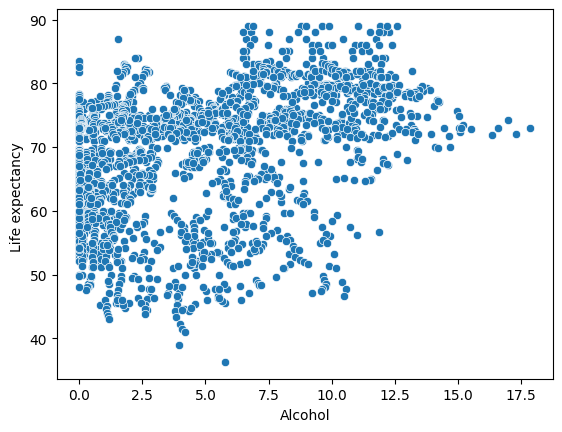

In [168]:
# 9) How does alcohol consumption relate to life expectancy? make plot

correlation_alcohol_life_expectancy=data[['Life expectancy ', 'Alcohol']].corr().iloc[0, 1]
correlation_alcohol_life_expectancy
sns.scatterplot(x=data['Alcohol'], y=data['Life expectancy '])
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17012\1808008532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI Category'] = pd.cut(data[' BMI '], bins=bmi_bins, labels=bmi_labels, right=False)


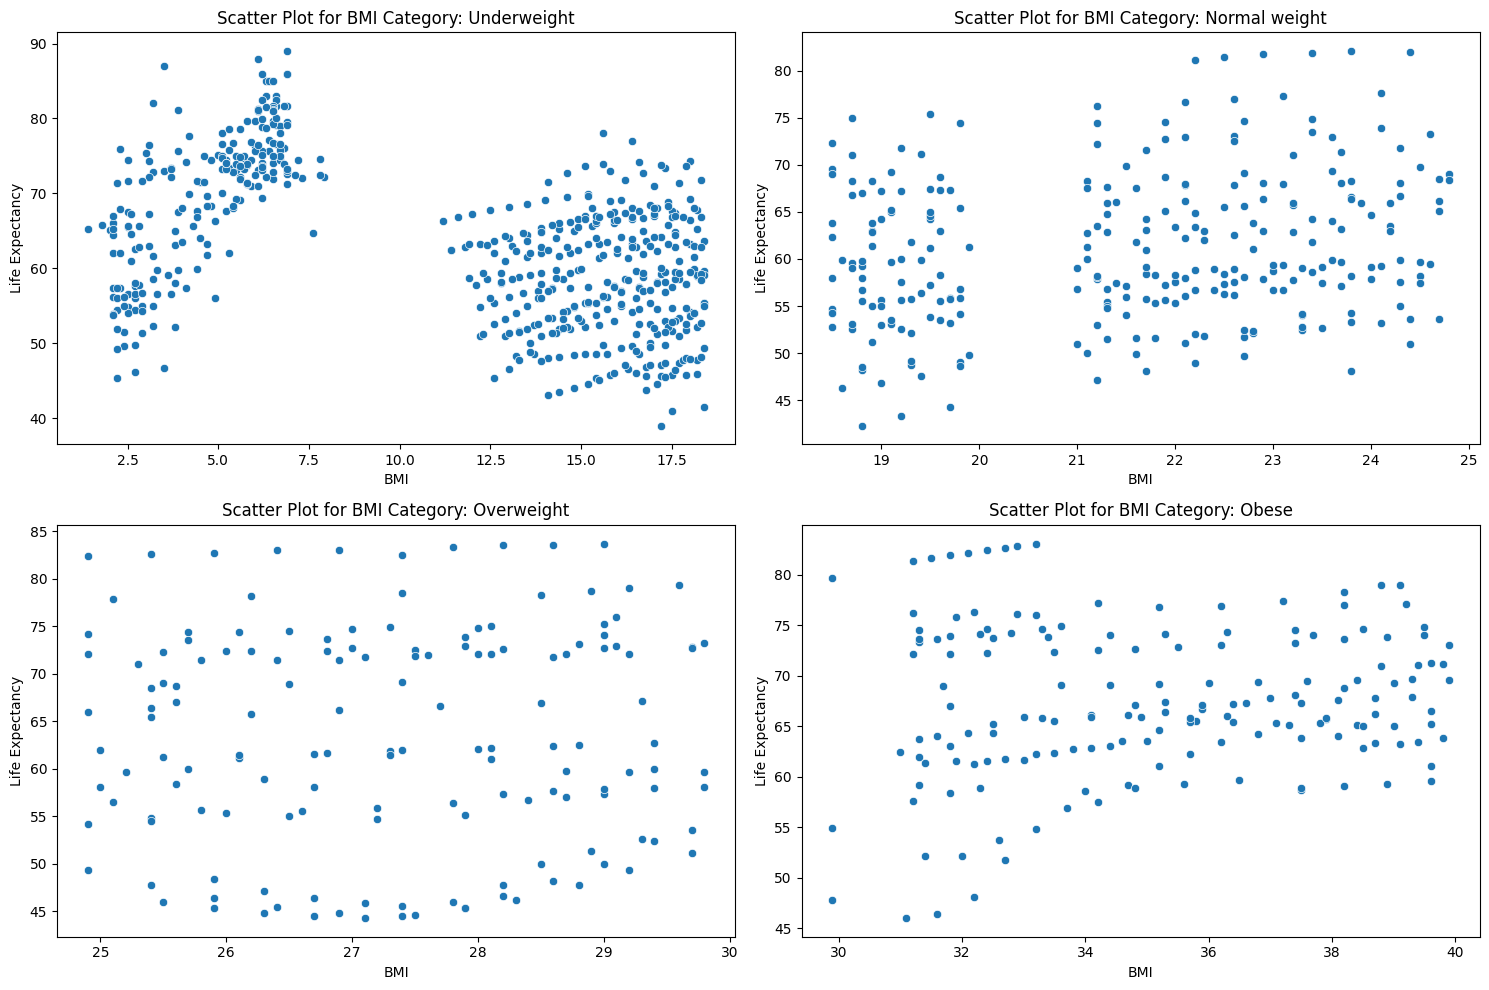

In [169]:


# Divide the BMI data into 4 ranges (bins)
bmi_bins = [0, 18.5, 24.9, 29.9, 40]  # Typical BMI categories: Underweight, Normal weight, Overweight, Obese
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data['BMI Category'] = pd.cut(data[' BMI '], bins=bmi_bins, labels=bmi_labels, right=False)

# Create subplots (2x2 grid for 4 ranges)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Iterate over the 4 BMI categories and plot on respective subplot
for i, category in enumerate(bmi_labels):
    ax = axes[i]
    subset = data[data['BMI Category'] == category]
    
    # Scatter plot for the current BMI category
    sns.scatterplot(x=subset[' BMI '], y=subset['Life expectancy '], ax=ax)
    ax.set_title(f'Scatter Plot for BMI Category: {category}')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Life Expectancy')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


0.24016039066456238


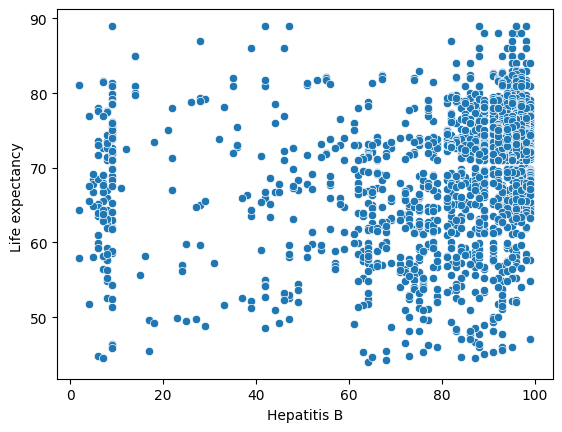

0.4586208012728201


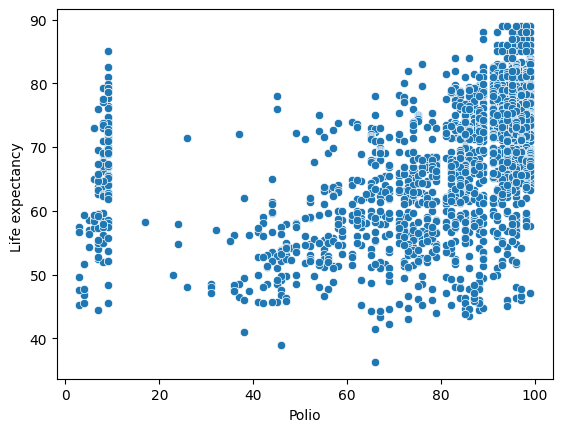

In [170]:
# 11) Does immunization coverage (Hepatitis B, Polio) affect life expectancy?

correlation_health_expenditure_life_expectancy=data[['Life expectancy ', 'Hepatitis B']].corr().iloc[0, 1]
print(correlation_health_expenditure_life_expectancy)
sns.scatterplot(x=data['Hepatitis B'], y=data['Life expectancy '])
plt.show()

correlation_health_expenditure_life_expectancy=data[['Life expectancy ', 'Polio']].corr().iloc[0, 1]
print(correlation_health_expenditure_life_expectancy)
sns.scatterplot(x=data['Polio'], y=data['Life expectancy '])
plt.show()


0.183087534966381


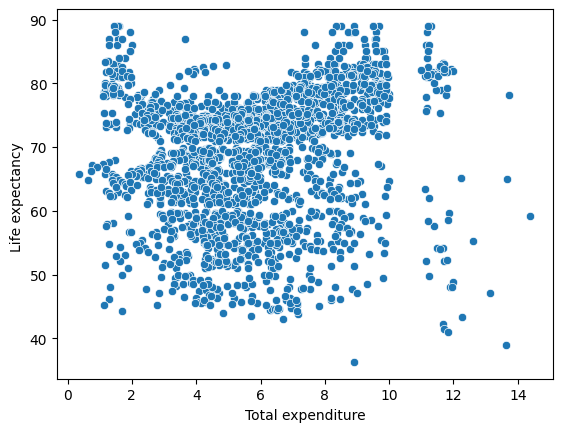

In [171]:
# 12) What is the effect of total health expenditure on life expectancy


correlation_health_expenditure_life_expectancy=data[['Life expectancy ', 'Total expenditure']].corr().iloc[0, 1]
print(correlation_health_expenditure_life_expectancy)
sns.scatterplot(x=data['Total expenditure'], y=data['Life expectancy '])
plt.show()